# House Prices Project

## Importing Libraries and Data :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.metrics import mean_squared_error

In [2]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

## Exploring Data :

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.info(),train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

(None, None)

<AxesSubplot:>

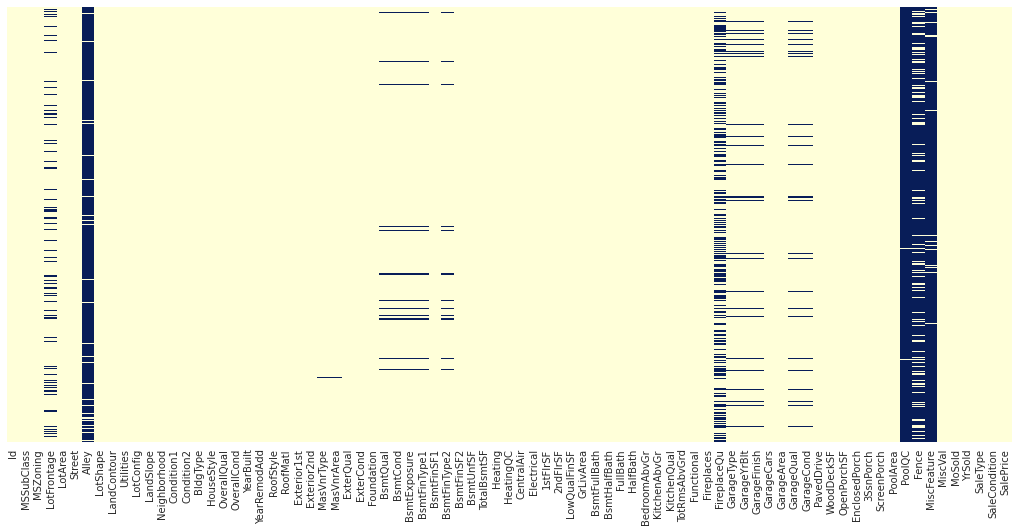

In [5]:
plt.figure(figsize=(18,8))
sb.heatmap(train_data.isnull(),cmap="YlGnBu",yticklabels=False,cbar=False)

In [6]:
def Find_missing_data (Data) :
    
    total = Data.isnull().sum().sort_values(ascending=False)
    percent = (Data.isnull().sum()/Data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    return missing_data

In [7]:
missing_train = Find_missing_data(train_data)
missing_train.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [8]:
missing_test = Find_missing_data(test_data)
missing_test.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


## Data Cleaning (Preprocessing) :

In [9]:
def find_missed_data_to_limit (Data,drop_limit_percentage) :
    
    drop_limit = int((Data.count().max()) * drop_limit_percentage)
    missed = Data.isnull().sum()
    missed = missed[missed > 0]
    missed_fill = missed[(missed <= drop_limit) & (missed > 0)]
    missed_drop = missed[missed > drop_limit]
    
    return missed_fill,missed_drop

In [10]:
# Find missed data in train & test

missed_fill_train , missed_drop_train = find_missed_data_to_limit( train_data ,0.25)
missed_fill_test , missed_drop_test = find_missed_data_to_limit( test_data ,0.25)

In [11]:
# Clean data from much nun values

train_data_cleaned = train_data.drop(missed_drop_train.index , axis=1)
test_data_cleaned = test_data.drop(missed_drop_test.index , axis=1)

In [12]:
def fill_null_Data_with_mode (Data,filled_columns) :
    
    for col in filled_columns :
        Data[col].fillna(Data[col].mode,inplace=True)
        
    return Data

In [13]:
def fill_null_Data_with_mean (Data,filled_columns) :
    
    for col in filled_columns :
        Data[col].fillna(Data[col].mean,inplace=True)
        
    return Data

In [14]:
# Fill little nun data (Optional fill)

#train_data = fill_null_Data_with_mode( train_data_cleaned , missed_fill_train.index )
#test_data = fill_null_Data_with_mode( test_data_cleaned , missed_fill_test.index )

train_data = fill_null_Data_with_mean( train_data_cleaned , missed_fill_train.index )
test_data = fill_null_Data_with_mean( test_data_cleaned , missed_fill_test.index )

<AxesSubplot:>

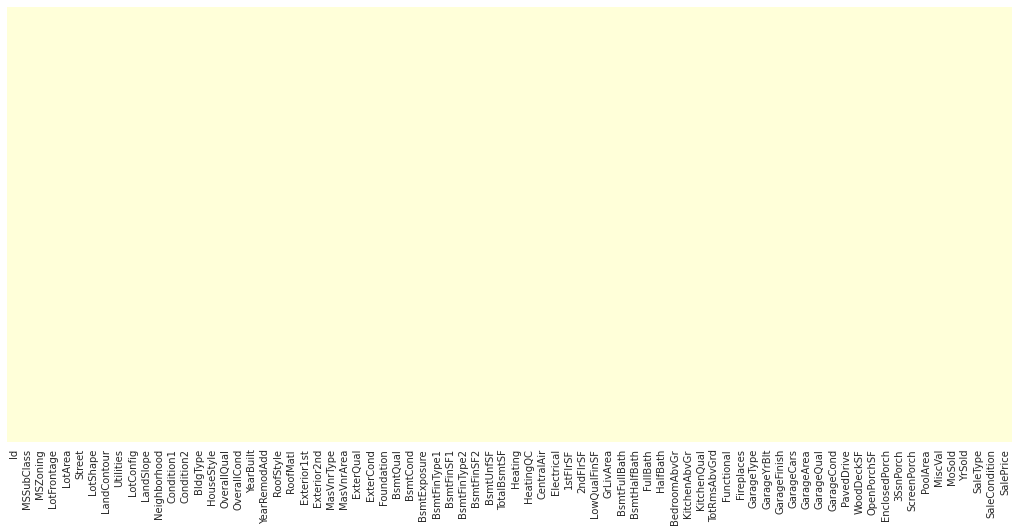

In [15]:
# Check that Train data is clean

fig = plt.figure(figsize=(18,8))
sb.heatmap(train_data_cleaned.isnull(),cmap="YlGnBu",yticklabels=False,cbar=False)

<AxesSubplot:>

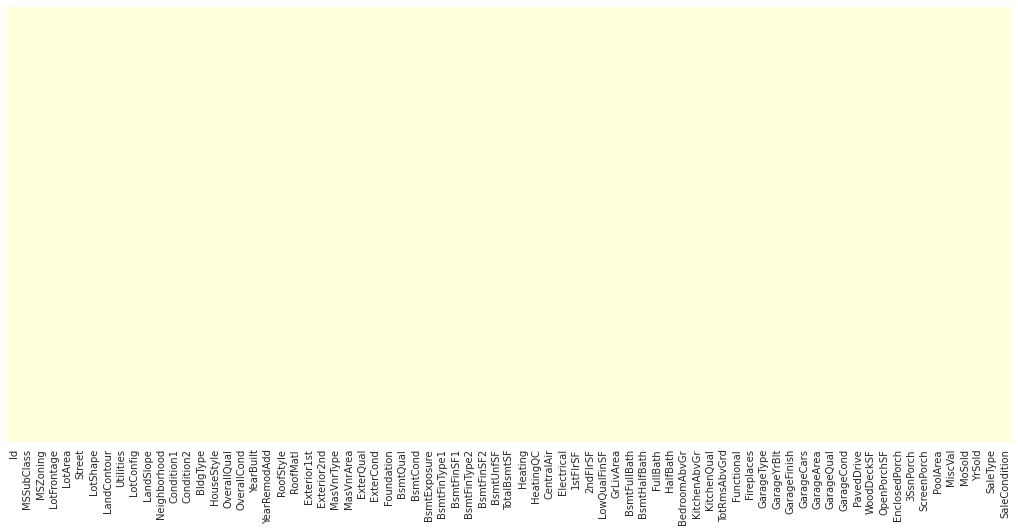

In [16]:
## Check that Test data is clean

fig = plt.figure(figsize=(18,8))
sb.heatmap(test_data_cleaned.isnull(),cmap="YlGnBu",yticklabels=False,cbar=False)

<AxesSubplot:>

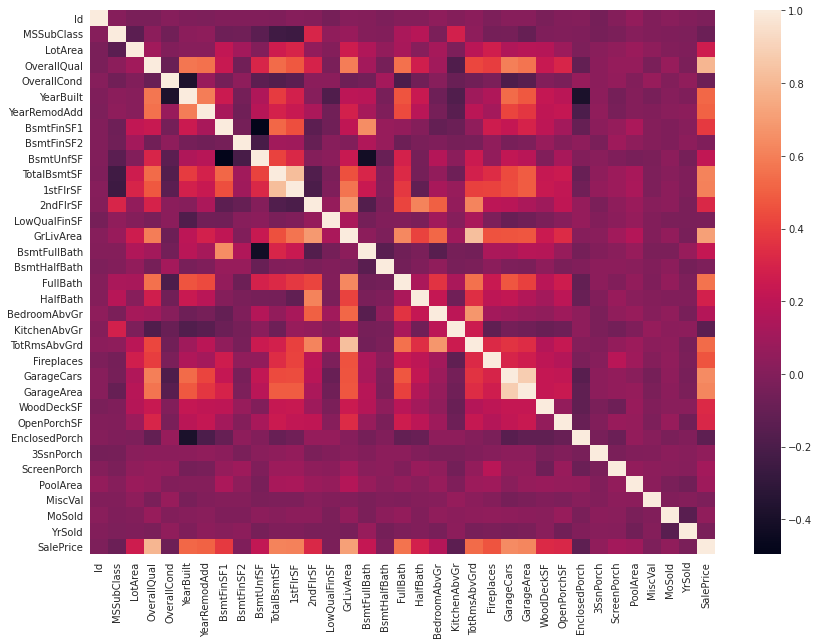

In [17]:
# Let us see correlation heatmap

fig = plt.figure(figsize=(14,10))
sb.heatmap(train_data_cleaned.corr())

In [18]:
# It seems like there are little corrlitions in our data

In [19]:
# Dropping classified data

def drop_columns_of_type (Data,Type) :
    
    Data_types = Data.dtypes
    Data = Data.drop(Data_types[Data_types==Type].index,axis=1)
    
    return Data

In [20]:
train_data_cleaned = drop_columns_of_type(train_data_cleaned,'object')
test_data_cleaned = drop_columns_of_type(test_data_cleaned,'object')

In [21]:
# Get dummies

dum_train = pd.get_dummies(train_data_cleaned.drop('Id',axis=1),drop_first=True)
dum_test = pd.get_dummies(test_data_cleaned.drop('Id',axis=1),drop_first=True)

In [22]:
def find_corr_with (Data,column,num_of_corr_cols) :

    corr = Data.corr()[column][dum_train.drop(column,axis=1).columns]
    corr = corr.sort_values()
    corr = corr[::-1]
    
    return corr.head(num_of_corr_cols)

In [23]:
# Find most correlated data

train_corr = find_corr_with(train_data_cleaned , 'SalePrice' , 10)
train_corr

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [24]:
# Checking Train and Test data after cleaning

train_data_cleaned.info(),test_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

(None, None)

In [25]:
# Preparing our data to the model (notice that train cleaned cols != test cleaned cols)
# So we will consider the intersection cols of Train and Test Data with correlated cols of train data with 'SalePrice'

X_train = dum_train[test_data_cleaned.columns.intersection(train_corr.index)]
y_train = dum_train['SalePrice']

X_test = dum_test[test_data_cleaned.columns.intersection(train_corr.index)]
y_test = sample_submission['SalePrice']

X_train.info(),X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   GrLivArea     1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1459 non-null   int64
 1   YearBuilt     1459 non-null   int64
 2   YearRemodAdd  1459 non-null   int64
 3   1stFlrSF      1459 non-null   int64
 4   GrLivArea     1459 non-null   int64
 5   FullBath      1459 non-null   int64
 6   TotRmsAbvGrd  1459 non-null   int64
dtypes: int

(None, None)

In [26]:
def plot_data_with (Data,column,Hue=None) :
    
    Data[column.name]=column
    plot = sb.PairGrid(Data,x_vars=Data.columns,y_vars=column.name,height=10,hue=Hue)
    plot.map(sb.scatterplot)
    Data.drop(column.name,axis=1,inplace=True)

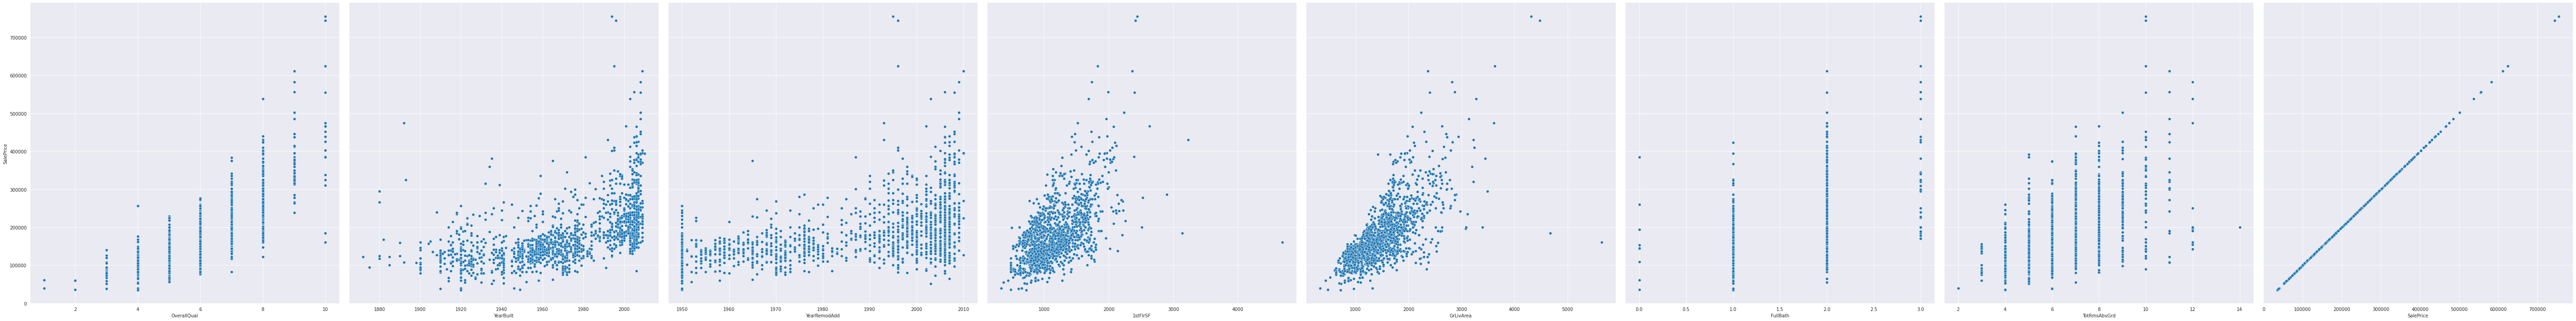

In [27]:
# See plots of the training data

plot_data_with(X_train,y_train)

# Machine Learning

## Linear Regression Model :

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
pred_lr = lr.predict(X_test)

In [32]:
# See how much our model correctly predict the Prices

print('Training Score : ', lr.score(X_train,y_train))
print('Test Score : ', lr.score(X_test,y_test))
print('Error :', np.sqrt(mean_squared_error(pred_lr,y_test)))

Training Score :  0.7608829258767256
Test Score :  -15.30876460392389
Error : 66684.83451516811


## Random Forest Regression Model :

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rfr = RandomForestRegressor()

In [35]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
pred_rfr = rfr.predict(X_test)

In [37]:
print('Training Score : ', rfr.score(X_train,y_train))
print('Test Score : ', rfr.score(X_test,y_test))
print('Error :', np.sqrt(mean_squared_error(pred_rfr,y_test)))

Training Score :  0.9775709945345061
Test Score :  -17.07646478326215
Error : 70205.84894899455


## K Neighbors Regression Model :

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
knn = KNeighborsRegressor()

In [40]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [41]:
pred_knn = knn.predict(X_test)

In [42]:
print('Training Score : ', knn.score(X_train,y_train))
print('Test Score : ', knn.score(X_test,y_test))
print('Error :', np.sqrt(mean_squared_error(pred_knn,y_test)))

Training Score :  0.7817575756179195
Test Score :  -14.488529747153587
Error : 64986.2748069276


## Multi-layer Perceptron Regression Model :

In [43]:
from sklearn.neural_network import MLPRegressor

In [44]:
mlpr = MLPRegressor()

In [45]:
mlpr.fit(X_train,y_train)

MLPRegressor()

In [46]:
pred_mlpr = mlpr.predict(X_test)

In [47]:
print('Training Score : ', mlpr.score(X_train,y_train))
print('Test Score : ', mlpr.score(X_test,y_test))
print('Error :', np.sqrt(mean_squared_error(pred_mlpr,y_test)))

Training Score :  0.5137320262143701
Test Score :  -3.0299315869605303
Error : 33148.6145994523


## Gradient Boosting Regression Model :

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
gbr = GradientBoostingRegressor()

In [50]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [51]:
pred_gbr = gbr.predict(X_test)

In [52]:
print('Training Score : ', gbr.score(X_train,y_train))
print('Test Score : ', gbr.score(X_test,y_test))
print('Error :', np.sqrt(mean_squared_error(pred_gbr,y_test)))

Training Score :  0.9238220225990159
Test Score :  -18.08842900307389
Error : 72144.23607933987


# The results of Machine Learning Models :

In [53]:
# Let's collect all results in a data frame

results_df = pd.DataFrame(data=np.array([pred_lr,pred_rfr,pred_knn,pred_mlpr,pred_gbr]).transpose(),
                          index=y_test.index,
                          columns=['Linear','Random Forest','K Neighbors',
                                   'Multi-layer Perceptron','Gradient Boosting'])
results_df.head(5)

,Linear,Random Forest,K Neighbors,Multi-layer Perceptron,Gradient Boosting
0,106228.225495,114205.08,113300.0,136703.137602,123062.269352
1,165644.318615,148044.00,153800.0,179869.825398,146773.106423
2,164954.732563,170581.13,178700.0,177558.539065,165143.991625
3,186483.954019,182320.00,178700.0,176255.766733,180064.994856
4,222662.253845,206145.00,194440.0,175925.275401,208807.219648


In [54]:
# Add to them the Actual Price of test

y_test_df = pd.DataFrame(data=np.array([y_test]).transpose(),
                          index=y_test.index,
                          columns=['y test (Actual Values)'])

results_df_to_y_test = results_df.join(y_test_df)
results_df_to_y_test

,Linear,Random Forest,K Neighbors,Multi-layer Perceptron,Gradient Boosting,y test (Actual Values)
0,106228.225495,114205.080000,113300.0,136703.137602,123062.269352,169277.052498
1,165644.318615,148044.000000,153800.0,179869.825398,146773.106423,187758.393989
2,164954.732563,170581.130000,178700.0,177558.539065,165143.991625,183583.683570
3,186483.954019,182320.000000,178700.0,176255.766733,180064.994856,179317.477511
4,222662.253845,206145.000000,194440.0,175925.275401,208807.219648,150730.079977
...,...,...,...,...,...,...
1454,88148.509713,82081.583333,83900.0,130577.544158,81128.163404,167081.220949
1455,88065.665896,81901.666667,83900.0,130611.506729,82439.251775,164788.778231
1456,145433.508883,139921.870000,144700.0,169821.779068,149524.669110,219222.423400
1457,134758.727394,112978.333333,124350.0,144853.186978,140706.950476,184924.279659


<AxesSubplot:>

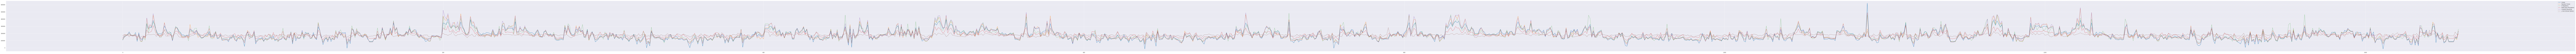

In [55]:
# Now let's plot all results and actual values to compare them (just to look how our models had gone)

plt.figure(figsize=(400,8))
sb.lineplot(data=results_df_to_y_test)

# It's some kind of big figure I think

In [56]:
# Now let's see our models errors and collect them into a data frame 

results_errors_df = pd.DataFrame(data=np.array([ np.sqrt(mean_squared_error(pred_lr,y_test)),
                                                 np.sqrt(mean_squared_error(pred_rfr,y_test)),
                                                 np.sqrt(mean_squared_error(pred_knn,y_test)),
                                                 np.sqrt(mean_squared_error(pred_mlpr,y_test)),
                                                 np.sqrt(mean_squared_error(pred_gbr,y_test))    ]),
                          index=['Linear','Random Forest','K Neighbors',
                                   'Multi-layer Perceptron','Gradient Boosting'],
                          columns=['Error'])

results_errors_df

,Error
Linear,66684.834515
Random Forest,70205.848949
K Neighbors,64986.274807
Multi-layer Perceptron,33148.614599
Gradient Boosting,72144.236079


<AxesSubplot:>

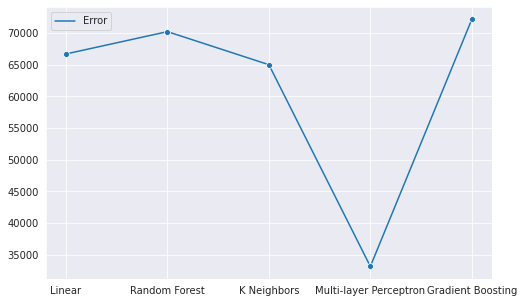

In [57]:
# Plot errors to have a look at our prediciton errors

plt.figure(figsize=(8,5))
sb.lineplot(data=results_errors_df,marker='o')

In [58]:
# Which model has the least error ?

results_errors_df[ results_errors_df["Error"] == results_errors_df["Error" ].min()]

,Error
Multi-layer Perceptron,33148.614599


In [59]:
my_submission = results_df['Multi-layer Perceptron']
my_submission

0       136703.137602
1       179869.825398
2       177558.539065
3       176255.766733
4       175925.275401
            ...      
1454    130577.544158
1455    130611.506729
1456    169821.779068
1457    144853.186978
1458    200316.109026
Name: Multi-layer Perceptron, Length: 1459, dtype: float64

In [60]:
my_submission_df = pd.DataFrame(data=np.array([my_submission]).transpose(),
                          index=my_submission.index + 1461,
                          columns=['SalePrice'])
my_submission_df.index.name = 'Id'
my_submission_df

,SalePrice
Id,
1461,136703.137602
1462,179869.825398
1463,177558.539065
1464,176255.766733
1465,175925.275401
...,...
2915,130577.544158
2916,130611.506729
2917,169821.779068


In [61]:
my_submission_df.to_csv('My Submission.csv')